ML-U test

In [1]:
#Import Library yang dibutuhkan.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


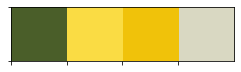

In [2]:
flatui = ["#4A5E29","#FADC44","#F0C20A","#D9D8C2"] #Membuat Color Palette
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

## Load data

In [3]:
initial_data = pd.read_excel('C:/Users/LEGION/Documents/homework_Quent_youtube/youtube_statistics.xlsx')

In [4]:
df =initial_data.copy()

Sumber data : https://www.kaggle.com/datasnaek/youtube-new?select=INvideos.csv 

In [5]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


## Pengenalan data

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  


1.   Terdapat Data null pada description (45 data).
2.   Tipe data **tranding date** dan **Publish time** harus diubah menjadi datetime64.
3.   Tipe data boolen ada baiknya di encoding aja.



In [71]:
df.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [72]:
num = df.select_dtypes(exclude=['object','datetime64','bool']).columns
cat = df.select_dtypes(include='object').columns
bools =df.select_dtypes(include='bool').columns

In [73]:
df[cat].describe()

,trending_date,title,channel_title,publish_time,tags,description
count,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,166


In [74]:
df[bools].describe()

,comments_disabled,ratings_disabled,video_error_or_removed
count,36791,36791,36791
unique,2,2,2
top,False,False,False
freq,35611,36034,36780


In [75]:
df[df[bools]==True][bools].sum()

comments_disabled         1180.0
ratings_disabled           757.0
video_error_or_removed      11.0
dtype: float64

# **Data Pre-Processing**

## Handling Missing Values

In [76]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

Karena discription merupakan data string yang tidak bisa dimanipulasi dengan pendekatan angka dan jumlahnya sedikit dibandingkan dengan jumlah dataset yang ada. maka lebih baik digantikan saja nilai nullnya menjadi tidak ada comment  ('-').

In [77]:
df['description'].fillna(value='-', inplace=True)

In [78]:
df.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

## Handling Duplicate values

In [79]:
df.duplicated().sum()

4229

In [80]:
df.duplicated(subset=['channel_title','category_id','title','tags','views','likes','dislikes','video_error_or_removed','description']).sum()

4232

Pengechekan data duplikat dengan melihat feature bersifat menyatakan identitas yang sangat potensial tidak berulang, sehingga perlu melakukan pengechekan data pada pilihan data kolom-kolom tertentu. Selanjutnya melakukan dropping data duplikat dan mengambil data pertama saja.

In [81]:
df.drop_duplicates(subset=['channel_title','category_id','title','tags','views','likes','dislikes','video_error_or_removed','description'],keep='first',inplace=True)

In [82]:
df.shape

(32559, 18)

Pemilihan drop duplikat kategori ditentukan berdasarkan kepentinggan sendiri, dimana dana kategorial mungkin akan menghasilkan pilihan yang sama,sehingga tidak diikutsertakan dalam perhitungan. sedangakan data yang bersifat identitas perlu dijadikan satu data. 

## Handling Outlier

### Pengechekan Outlier

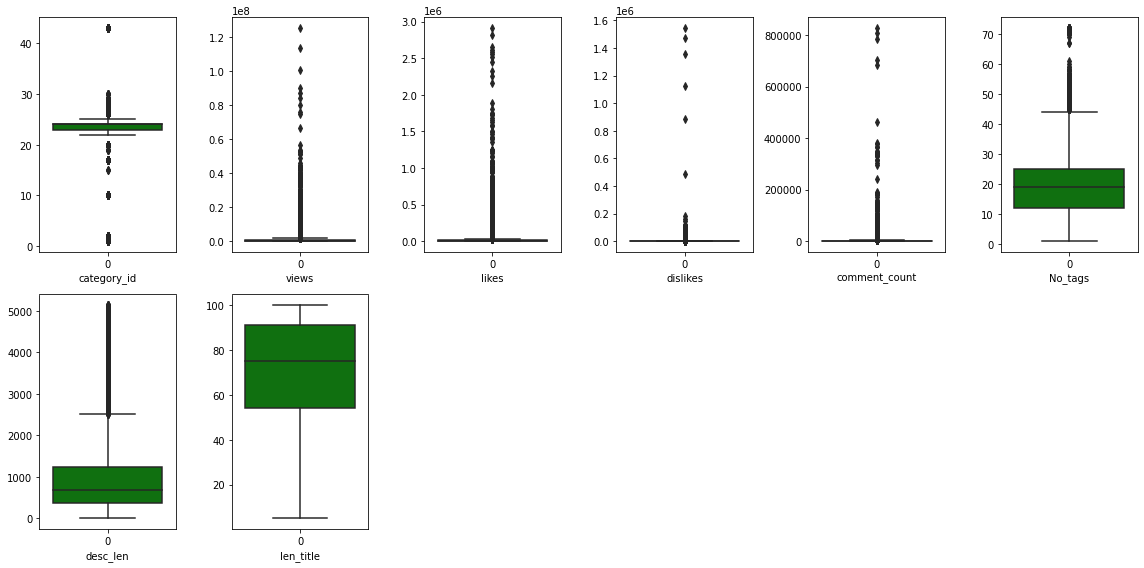

In [83]:
plt.figure(figsize=(16,8))

for i in range(0,len(num)):
  plt.subplot(2,6,i+1)
  axes = sns.boxplot(data=df[num[i]],color='green',orient='v')
  plt.xlabel(num[i])
  plt.tight_layout()
plt.savefig('Outlier.png')


Berdasarkan informasi grafik persebaran data setiap featurenya, terdapat outlier disetiap feature namun tidak begitu jelas persebaran outliernya. sehingga perlu treatment lanjutan dengan mengunakan metode z-score untuk menentukan batas nilai yang tergolong outlier.

### Menghitung jumlah persentase outlier setiap featurenya

In [84]:
from scipy import stats

lista=[]
for i in num:
  zscore =np.abs(stats.zscore(df[i]))
  filter = (zscore > 3)
  data_filter = df[filter]
  outlier_percentage = ((len(data_filter)/len(df[i]))*100)
  lista.append(outlier_percentage)
  print(f'Persentase outlier {i} = ',outlier_percentage)

print('total outlier = ',sum(lista))

Persentase outlier category_id =  5.129150158174391
Persentase outlier views =  1.4189624988482445
Persentase outlier likes =  1.6493135538560768
Persentase outlier dislikes =  0.20270892840689209
Persentase outlier comment_count =  0.7186952916244357
Persentase outlier No_tags =  0.7831935870266286
Persentase outlier desc_len =  2.0670168002702787
Persentase outlier len_title =  0.0
total outlier =  11.969040818206947


jumlah keseluruhan persentase featurenya ialah 11,9% dari keseluruhan data. Hasil total persen outlier ini tidak mencerminkan total outlier yang ada secara pasti, kerena mungkin saja dalam satu row terdapat beberapa feature yang outlier.

Mungkin dari hasil ini yang perlu diperhatikan ialah bagian persentase outlier setiap featurenya.

### Drop Outlier dengan mengunakan Z-Scores

In [85]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))  #Memanipulasi seakan akan datanya diisi oleh data true semuanya, kemudian nanti dimodifikasi.
for i in num:
  zscore =np.abs(stats.zscore(df[i]))
  filtered_entries = (zscore < 3) & (filtered_entries)

df=df[filtered_entries]
print('Jumlah data setelah di filter',len(df))

Jumlah baris sebelum memfilter outlier: 32559
Jumlah data setelah di filter 29352


Pengunaan Z-score berperan untuk memfilter data yang termasuk dalam batas normal, dimana z-score menghitung berdasarkan probability data yang dikonversikan terlebih dahulu ke kondisi normal kemudian dilakukan filter batas data yang termasuk dalam batas penerimaan dan data yang melebihi batas tersebut akan digolongkan sebagai data yang outlier. Hal yang perlu dipastikan ketika mengunakan metode ini ialah memastikan sekitar mean=0 dan standardeviasi=1. 

referensi : https://statistics.laerd.com/statistical-guides/standard-score.php

## Modifikasi Feature

### Mengubah tipe data Tranding Date menjadi datetime.

In [86]:
from datetime import datetime

In [87]:
df['trending_date'] = pd.to_datetime(df['trending_date'],format='%Y-%m-%d')
df['publish_time'] = pd.to_datetime(df['publish_time'],format='%H:%M:%S')

Pengubahan tipe data penting untuk memanipulasi tahap selanjunya atau mendapatkan insight dari data waktu yang ada.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29352 entries, 1 to 36769
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           29352 non-null  datetime64[ns]
 1   title                   29352 non-null  object        
 2   channel_title           29352 non-null  object        
 3   category_id             29352 non-null  int64         
 4   publish_time            29352 non-null  datetime64[ns]
 5   tags                    29352 non-null  object        
 6   views                   29352 non-null  int64         
 7   likes                   29352 non-null  int64         
 8   dislikes                29352 non-null  int64         
 9   comment_count           29352 non-null  int64         
 10  comments_disabled       29352 non-null  bool          
 11  ratings_disabled        29352 non-null  bool          
 12  video_error_or_removed  29352 non-null  bool  

In [195]:
df1 =df.copy().reset_index()

### Feature Encoding

Mengubah feature boolean menjadi data numeric dengan label encoding mengunakan fungsi categori(.cat.codes), supaya dapat digunakan untuk perhitungan korelasi.

In [196]:
for i in bools:
  df1[i] = df1[i].astype('category').cat.codes

In [197]:
df1.head()

,index,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,1900-01-01 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,1,0,0,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
1,2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,1900-01-01 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,0,0,0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
2,3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,1900-01-01 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,0,0,0,This video showcases the difference between pe...,20,263,30,2017-11-12
3,4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,1900-01-01 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,0,0,0,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13
4,5,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,1900-01-01 04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,0,0,0,Watch MCA- Middle Class Abbayi First Look Teas...,22,449,91,2017-11-10


In [101]:
df1[bools].value_counts()

comments_disabled  ratings_disabled  video_error_or_removed
0                  0                 0                         27998
1                  0                 0                           684
0                  1                 0                           353
1                  1                 0                           317
dtype: int64

In [102]:
df1['comments_disabled'].value_counts()

0    28351
1     1001
Name: comments_disabled, dtype: int64

In [104]:
df1['ratings_disabled'].value_counts()

0    28682
1      670
Name: ratings_disabled, dtype: int64

Ternyata tidak ada data yang True/1 didalam Feature hasil label encoding, mungkin informasi True sudah ikut terhapus pada saat pembersihan data outlier.

Mungkin tahap selanjutnya, **feature ini bisa di drop saja**, kerena tidak ada variasi data atau tidak menjelaskan apa-apa datanya.

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29352 entries, 0 to 29351
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   29352 non-null  int64         
 1   trending_date           29352 non-null  datetime64[ns]
 2   title                   29352 non-null  object        
 3   channel_title           29352 non-null  object        
 4   category_id             29352 non-null  int64         
 5   publish_time            29352 non-null  datetime64[ns]
 6   tags                    29352 non-null  object        
 7   views                   29352 non-null  int64         
 8   likes                   29352 non-null  int64         
 9   dislikes                29352 non-null  int64         
 10  comment_count           29352 non-null  int64         
 11  comments_disabled       29352 non-null  int8          
 12  ratings_disabled        29352 non-null  int8  

# EDA

## Business Insight from data

In [198]:
# df1['date_publish'] = pd.to_datetime(df1['publish_time']).dt.date
df1['time_publish'] = pd.to_datetime(df1['publish_time']).dt.time
df1['hour_publish'] = pd.to_datetime(df1['publish_time']).dt.hour
df1['minute_publish'] = pd.to_datetime(df1['publish_time']).dt.minute

In [199]:
df1.drop(columns=['publish_time','description','title'],inplace=True,axis=1)
df1.head(2)

,index,trending_date,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,time_publish,hour_publish,minute_publish
0,1,2017-11-14,HJ NEWS,25,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,1,0,0,19,2232,58,2017-11-13,05:43:56,5,43
1,2,2017-11-14,TFPC,24,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,0,0,0,14,482,58,2017-11-12,15:48:08,15,48


### Views's feature Review 

In [200]:
round(df1['views'].describe())

count       29352.0
mean       630556.0
std       1127570.0
min          4024.0
25%        109084.0
50%        254370.0
75%        640362.0
max      10495263.0
Name: views, dtype: float64

Ternyata, views terbanyak ialah 10495263.0 dan terendah 4024.0 sedangkan rata-rata views berada pada nilai 630556.0. secara garis besar content yang diposting memiliki view yang cukup besar (Lebih dari 600K Views).

### Jam berapa banyak orang publish dapat menghasilkan views yang besar?

In [108]:
df1['views'].max()

10495263

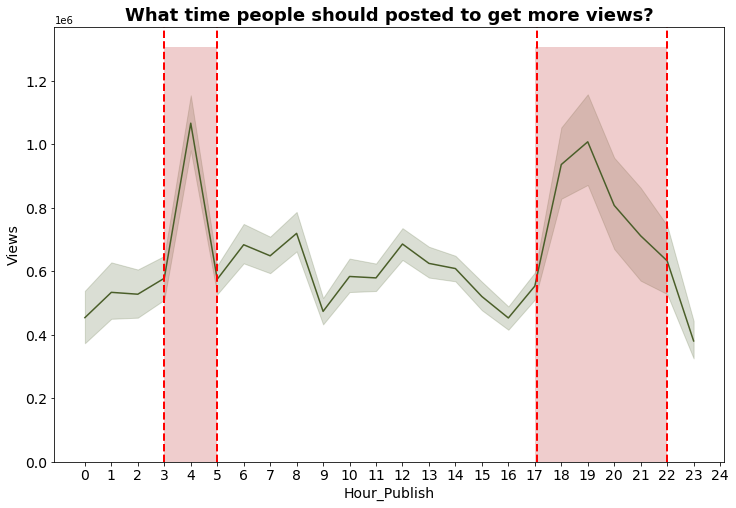

In [109]:
plt.figure(figsize=(12,8))
axes = sns.lineplot(data=df1,x='hour_publish',y='views',markers='o',palette='BuPu',estimator='mean')
axes.set_xticks(np.arange(0,25,step=1))

# axes.annotate('What time people should posted to get more views',xy=(30, 0.013), xytext=(55, 0.016),
#            ha='center')

plt.stackplot(np.arange(17,23 ,1), [[1305263]], colors=('indianred',), alpha=0.3)
plt.axvline(x=17.1, color='red', linestyle='--', linewidth=2)
plt.axvline(x=22, color='red', linestyle='--', linewidth=2)
plt.stackplot(np.arange(3,6 ,1), [[1305263]], colors=('indianred',), alpha=0.3)
plt.axvline(x=3, color='red', linestyle='--', linewidth=2)
plt.axvline(x=5, color='red', linestyle='--', linewidth=2)

axes.set_title('What time people should posted to get more views?',color='black',fontsize=18,fontweight='bold')
axes.set_ylabel('Views', fontsize=14) 
axes.set_xlabel('Hour_Publish', fontsize=14) 
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('Time_Should_Posted.png')


Berdasarkan gambar diatas, menunjukkan bahwa jam terbaik dalam posting content disarankan pada jam 3-5 dini hari dan jam 17-22 malam hari pada waktu india setempat. Hal ini menunjukkan peningkatan view yang signifikan pada jam tersebut.

### Kategori mana yang proses trandingnya lebih cepat? (Barplot)

In [206]:
df1['faster_tranding'] = ((df1['trending_date']-df1['publish_date']).astype('str')).str.split()

In [208]:
numbers=[]
for i in df1['faster_tranding']:
  numbers.append(int(i[0]))

df1['faster_tranding']=numbers

In [209]:
df1.groupby(['faster_tranding'])['category_id'].transform('count').inplace=True #.sort_values(ascending=True)

In [210]:
df1.drop(columns=['index']).head()

,trending_date,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,time_publish,hour_publish,minute_publish,faster_tranding
0,2017-11-14,HJ NEWS,25,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,1,0,0,19,2232,58,2017-11-13,05:43:56,5,43,1
1,2017-11-14,TFPC,24,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,0,0,0,14,482,58,2017-11-12,15:48:08,15,48,2
2,2017-11-14,Eruma Saani,23,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,0,0,0,20,263,30,2017-11-12,07:08:48,7,8,2
3,2017-11-14,Filmylooks,24,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,0,0,0,11,753,88,2017-11-13,01:14:16,1,14,1
4,2017-11-14,Dil Raju,24,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,0,0,0,22,449,91,2017-11-10,04:29:50,4,29,4


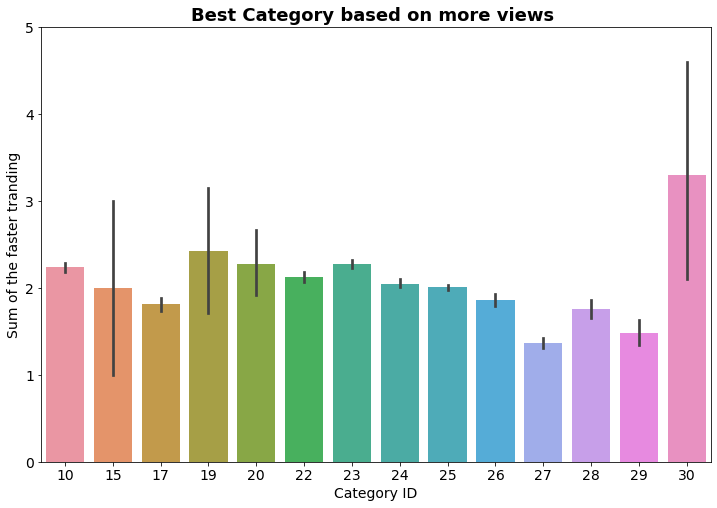

In [212]:
plt.figure(figsize=(12,8))
axes = sns.barplot(data=df1,x='category_id',y='faster_tranding')

plt.ylim(0,5)
axes.set_title('Best Category based on more views ',color='black',fontsize=18,fontweight='bold')
axes.set_ylabel('Sum of the faster tranding', fontsize=14) 
axes.set_xlabel('Category ID', fontsize=14) 
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.savefig('Best_categories.png')

Kategori 30 (Movies) merupakan kategori___ dan tercepat trandingnya dibandingkan kategori lainnya. sedangkan untuk kategori 10 (Music),19(Travel and Event) ,20 (Gaming),22(people and blogs),23(Comedy) relatif tinggi dan menunjukkan bahwa user india lebih senang pada konten tersebut. hal yang paling tidak disukai oleh user india ialah kategori 27 (Education). 


Link untuk referensi categori id : https://gist.github.com/dgp/1b24bf2961521bd75d6c

### Tanggal berapa views,like,dislike terbanyak? (Line Plot)

In [115]:
df1.head()

,index,trending_date,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,time_publish,hour_publish,minute_publish,faster_tranding
0,1,2017-11-14,HJ NEWS,25,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,1,0,0,19,2232,58,2017-11-13,05:43:56,5,43,1
1,2,2017-11-14,TFPC,24,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,0,0,0,14,482,58,2017-11-12,15:48:08,15,48,2
2,3,2017-11-14,Eruma Saani,23,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,0,0,0,20,263,30,2017-11-12,07:08:48,7,8,2
3,4,2017-11-14,Filmylooks,24,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,0,0,0,11,753,88,2017-11-13,01:14:16,1,14,1
4,5,2017-11-14,Dil Raju,24,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,0,0,0,22,449,91,2017-11-10,04:29:50,4,29,4


In [116]:
df1['month_trending_date']= df1['trending_date'].dt.month

In [191]:
print(f'The Avearge Tranding date in the Indian region :  ' + str(round(df1['month_trending_date'].mean())) + '  days')

The Avearge Tranding date in the Indian region :  5  days


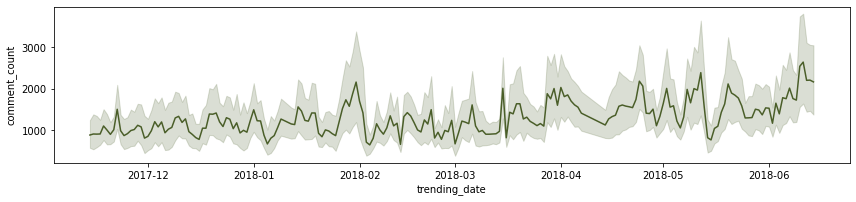

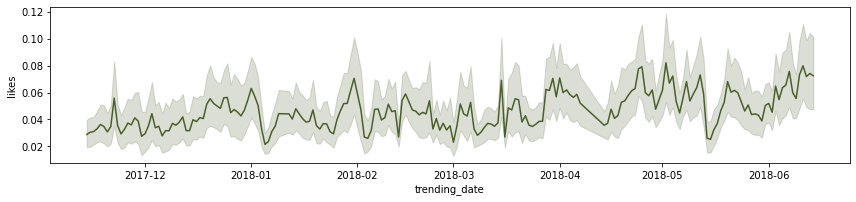

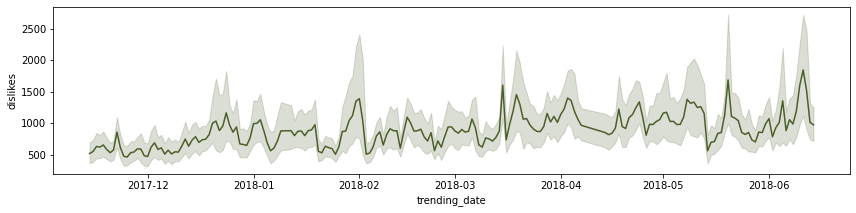

In [181]:
list_columns =['comment_count','likes','dislikes']
for i in list_columns:
  plt.figure(figsize=(12,8))
  plt.subplot(3,1,list_columns.index(i)+1)
  sns.lineplot(data=df1,x='trending_date',y=i, palette='flare')
  plt.tight_layout()
  
plt.savefig('How_many_Likes_dislike_comment.png')

Pada umumnya setiap bulan terjadi fluktuasi jumlah view yang tinggi dan berhubungan dengan jumlah like,dislike dan comment kecuali pada bulan 03-2018. menariknya mengapa pada bula 3 tidak terjadi fluktuasi yang cukup tinggi?.
pada bulan ke 4-6 2018 adalah moment fluktuasi yang signifikan. 

teradapat fakta menarik bahwa pada tahun 2021 ini bulan April mempunyai waktu cuti terbanyak  sebanyak 12 kali untuk peristiwa peringatan. mungkin hal ini berhubungan dengan kanaikan jumlah views dari YouTube dimana moment ini digunakan untuk banyak posting video moment yang relevan dengan kondisi perayaan daerah tersebut. 

(referensi weekend date: https://www.timeanddate.com/holidays/india/ )


Menurut laporan Gadgets Now Bureau dalam The Time of India, bahwa pada tahun 2018 content youtube yang paling diminati ialah konten dengan genre Entertainment dan Movie yang berhubngan dengan menari(dance) namun mereka sudah semakin teredukasi dengan adanya kata kunci paling banyak ditemukan ialah "how to make/learn something..." 

Read more at:
http://timesofindia.indiatimes.com/articleshow/66970770.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

In [204]:
list_values = np.array(df1['likes'].sort_values(ascending=False).head(10))

sums_like = df1[df1['likes']>=df1['likes'].mean()].reset_index(drop=True)

In [205]:
sums_like.sort_values('likes',ascending=False).sample(10)

,index,trending_date,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,time_publish,hour_publish,minute_publish
5900,36690,2018-06-14,Lahari Music | T-Series,10,"vishwaroopam 2 trailer|""vishwaroopam 2 officia...",1285696,31603,1631,1537,0,0,0,19,640,67,2018-06-11,11:32:28,11,32
5354,33618,2018-05-28,Kunal Kamra,22,"kunal kamra|""kunal stand up""|""kunal kamra come...",1184842,51572,3840,13080,0,0,0,16,301,43,2018-05-24,11:05:25,11,5
4151,27043,2018-04-22,Sandeep Maheshwari,22,"Latest|""Sandip""|""Maheswari""|""Inspirational""|""V...",465367,31590,480,2456,0,0,0,46,594,60,2018-04-21,11:08:58,11,8
2916,19453,2018-03-03,The Daily Show with Trevor Noah,23,"the daily show|""trevor noah""|""daily show with ...",900419,22031,585,2417,0,0,0,27,354,77,2018-03-02,04:30:01,4,30
2463,16544,2018-02-14,My Village Show,23,"my village show|""anji mama""|""raju""|""sriram sri...",580612,16417,1914,2047,0,0,0,14,755,66,2018-02-11,16:08:54,16,8
2468,16562,2018-02-14,Captain Nick,24,"captain nick|""niharicka""|""latest funny videos""...",57069,15134,134,1528,0,0,0,24,349,49,2018-02-13,18:30:01,18,30
2173,14834,2018-02-04,Mana Health And More,26,"chandra grahanam|""lunar eclipse""|""chandra grah...",2994756,20739,3189,42,0,0,0,22,499,100,2018-01-30,04:16:12,4,16
885,6581,2017-12-19,White Hill Music,10,"punjabi songs|""punjabi bhangra""|""punjabi music...",1246986,18747,1073,893,0,0,0,23,2050,100,2017-12-17,05:29:15,5,29
1614,11098,2018-01-14,Jimmy Kimmel Live,23,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",2583424,25747,7267,15274,0,0,0,28,2150,47,2018-01-12,02:51:31,2,51
2841,18772,2018-02-27,T-Series,10,"Naam Hai Tera|""Naam Hai mera song""|""hate story...",9181013,126619,18393,7440,0,0,0,28,1540,84,2018-02-23,06:34:41,6,34


### Apakah jumlah tags sangat berpengaruh terhadap views?

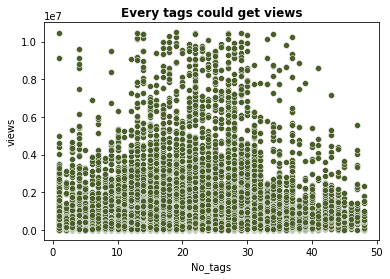

In [126]:
sns.scatterplot(data=df1,x='No_tags',y='views') 
plt.title('Every tags could get views',fontsize=12,fontweight='bold',loc='center')
plt.savefig('Sum_for_tags.png')

secara persebaran data yang ada, ternyata jumlah tags yang cukup memberikan views yang tinggi berada pada jumlah 15-30 tags.

### Kategori mana yang views paling banyak dan tidak?

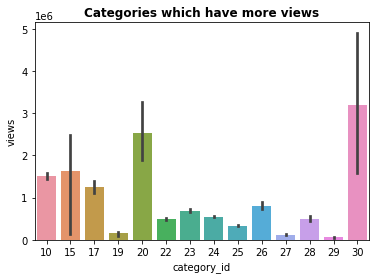

In [128]:
sns.barplot(data=df1,x='category_id',y='views')
plt.title('Categories which have more views',fontsize=12,fontweight='bold',loc='center')
plt.savefig('Categories_views.png')

Jika dikaitkan dengan kategori yang tercepat tranding, ternyata tidak sepenuhnya memiliki hubungan yang lurus diantara kategori yang cepat tranding juga memiliki view yang tinggi. terlihat jelas pada kategori 22,19,10 dimana secara tranding bisa lebih cepat, namun tidak menunjukkan view yang tinggi juga.

## Feature Selection

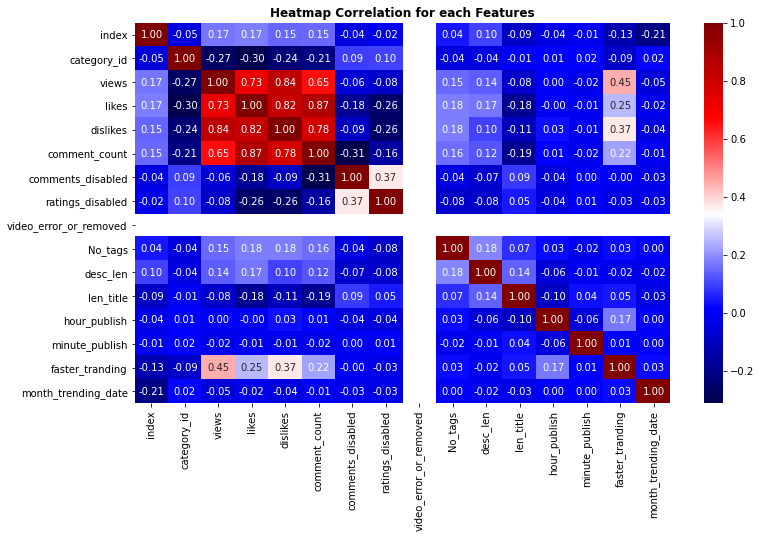

In [153]:
plt.figure(figsize=(12,7))

mask = np.zeros_like(df1.corr())
sns.heatmap(df1.corr(method='spearman'),fmt='.2f',annot=True,cmap='seismic')
plt.title('Heatmap Correlation for each Features',fontsize=12, fontweight='bold')
plt.savefig('Heatmap Correlation.png')
# sns.heatmap(df1.corr(),fmt='.2f',annot=True,cmap='seismic')

Pengunaan metode Spearmen, lebih efektik karena robust terhadap kondisi data yang skew. Sehingga dia hanya melihat dari ranking data.
kekosongan nilai pada video_error_or_removed ini menunjukkan bahwa data yang tersimpan tidak bervariasi atau seragam (Nilainya  0 semua) sehingga tidak dapat menentukan korelasi terhadap feature apa pun. 
Fitur penting dalam hal ini ialah like dan kategori id, numof tags,desc_len dan faster tranding.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


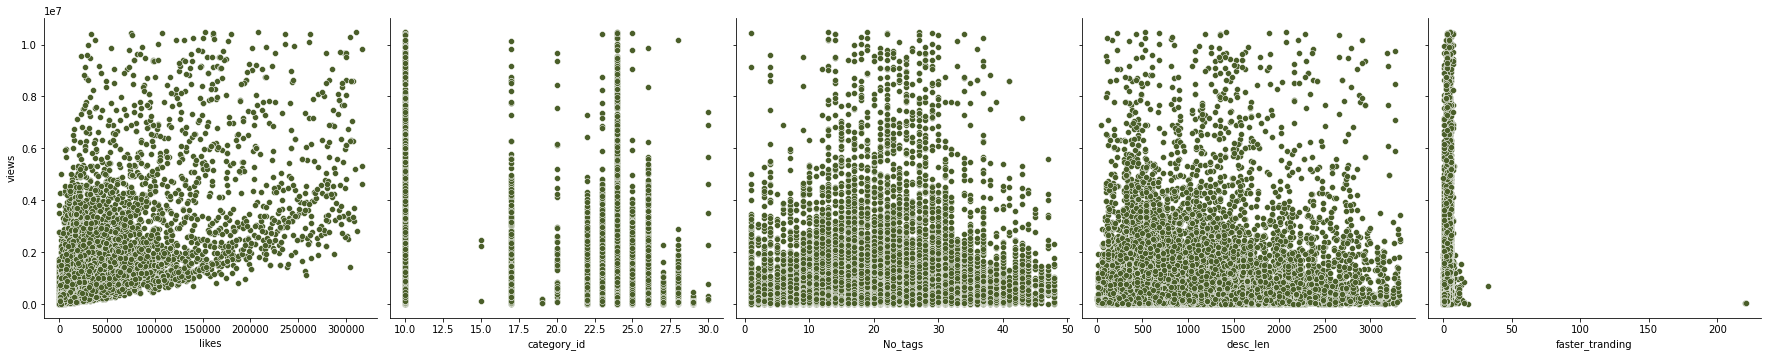

In [139]:
sns.pairplot(data=df1,x_vars=['likes','category_id','No_tags','desc_len','faster_tranding'],y_vars=['views'],size=5)
# plt.title('Plot Distribution feature important for sum of views')
plt.savefig('Feature_Important.png')

Melihat distribusi data terlihat distribusi yang cenderung random, sehingga pengunaan linear regression sepertinya kurang sesuai atau direkomendasikan dengan mengunakan pendekatan algoritma yang lain.

## Target Engineering

Text(0.5, 1.0, 'Distribution plot of Views Feature')

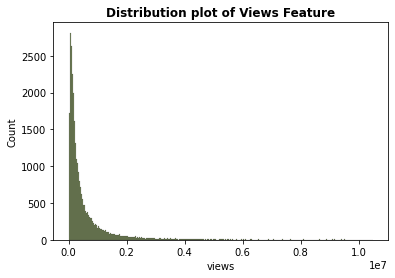

In [141]:
sns.histplot(data=df1,x='views')
plt.title('Distribution plot of Views Feature',fontsize=12,fontweight='bold')

Text(0.5, 1.0, 'Distribution plot of Views Feature after Normalization')

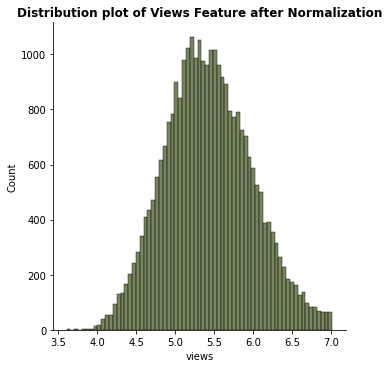

In [142]:
df1['views'] = np.log10(df1['views'])
sns.displot(data=df1,x='views')
plt.title('Distribution plot of Views Feature after Normalization',fontsize=12,fontweight='bold')

## Features Important with Lasso

In [143]:
df1.columns

Index(['index', 'trending_date', 'channel_title', 'category_id', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'No_tags', 'desc_len',
       'len_title', 'publish_date', 'time_publish', 'hour_publish',
       'minute_publish', 'faster_tranding', 'month_trending_date'],
      dtype='object')

In [144]:
x = df1.drop(columns=['views','trending_date','publish_date','channel_title','tags','time_publish','hour_publish','minute_publish'],axis=1)
y = df1['views']

In [145]:
x.columns

Index(['index', 'category_id', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'No_tags', 'desc_len', 'len_title', 'faster_tranding',
       'month_trending_date'],
      dtype='object')

In [146]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MinMaxScaler().fit_transform(x)

array([[0.00000000e+00, 7.50000000e-01, 2.31875097e-03, ...,
        5.57894737e-01, 4.52488688e-03, 9.09090909e-01],
       [2.71975631e-05, 7.00000000e-01, 6.34422883e-03, ...,
        5.57894737e-01, 9.04977376e-03, 9.09090909e-01],
       [5.43951262e-05, 6.50000000e-01, 2.21947057e-01, ...,
        2.63157895e-01, 9.04977376e-03, 9.09090909e-01],
       ...,
       [9.99211271e-01, 3.50000000e-01, 4.20088270e-02, ...,
        8.63157895e-01, 4.52488688e-03, 4.54545455e-01],
       [9.99700827e-01, 6.50000000e-01, 2.70050886e-01, ...,
        2.84210526e-01, 1.35746606e-02, 4.54545455e-01],
       [1.00000000e+00, 6.50000000e-01, 3.52387052e-02, ...,
        6.52631579e-01, 4.52488688e-03, 4.54545455e-01]])

In [147]:
from sklearn.linear_model import LassoCV

model_lasso  = LassoCV()
model_lasso.fit(x,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [148]:
list(zip(x.columns,model_lasso.fit(x,y).coef_))

[('index', 5.963992123437726e-06),
 ('category_id', -0.0),
 ('likes', 7.157806334998055e-06),
 ('dislikes', 8.231432045999632e-05),
 ('comment_count', -2.2972781098113798e-05),
 ('comments_disabled', -0.0),
 ('ratings_disabled', -0.0),
 ('video_error_or_removed', 0.0),
 ('No_tags', 0.0),
 ('desc_len', 3.994840909577146e-05),
 ('len_title', 0.0),
 ('faster_tranding', 0.0),
 ('month_trending_date', -0.0)]

Berdasarkan pertimbangan korelasi heatmap dengan model lasoo menunjukkan beberapa feature yang diangapa penting karena memiliki korelasi dan nilai gradient yang saling mempengaruhi antar feature terhadap target. Feature tersebut berupa **Likes,desc_len, faster_tranding dan Category_id**. 

# Modelling

## Split-Train Test data.

In [158]:
X = df1[['likes','category_id','No_tags','desc_len','faster_tranding']] # menggunakan semua feature kecuali target
Y = df1['views']

In [159]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=1/3, random_state=42) #Splitting the data into Train and Test

In [160]:
xtrain.shape

(19568, 5)

In [161]:
xtest.shape

(9784, 5)

## Evaluation Function

In [167]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
for i in X.columns:
  X[i]= MinMaxScaler().fit_transform(X[i].values.reshape(len(X), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# Uji Coba Model

In [170]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.26
RMSE: 0.36
R2 score: 0.57


In [179]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.20
RMSE: 0.26
R2 score: 0.77


In [172]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.42
RMSE: 0.52
R2 score: 0.10


In [173]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
pred = regressor.predict(xtest)
eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

# print('Coefficients: \n', regressor.coef_) # The slope
# print('Intercept: \n', regressor.intercept_) # The Intercept

MAE: 0.34
RMSE: 0.44
R2 score: 0.35


Model yang paling baik untuk digunakan ialah model RandomForest dengan RMSE/MAE yang lebih kecil dibandingkan yang lainnya. Algoritma ini yang akan dilakukan tunning parameter untuk meningkatkan ketepatan prediksi atau menghasilkan error yang kecil.

# Tunning Parameter

In [174]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num =10)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak , disini digunakan karena kita mengunakan sistem random sample
                       criterion = ['mse'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Fitting 
rf = RandomForestRegressor(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42)
rf_tuned.fit(xtrain,ytrain)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [175]:
predic = rf_tuned.predict(xtest)
eval_regression(rf_tuned, predic, xtrain, ytrain, xtest, ytest)

MAE: 0.20
RMSE: 0.26
R2 score: 0.78


In [176]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 300
Best bootstrap: True
Best criterion: mse
Best max_depth: 80
Best min_samples_split: 11
Best min_samples_leaf: 1
Best max_features: sqrt
Best n_jobs: -1


Berdasarkan hasil tunning parameter ini, ditemukan perubahan nilai RMSE sebesar 0.3 dari error sebelum ditunning, perubahan MAE sebesar 0.1 dari error sebelum ditunning. sementara nilai R2 meningkat cukup signifikan sebesar 0.12. Hal ini akan menghasilkan hasil prediksi yang lebih akurat.

Proses tunning parameter dilakukan untuk mengurangi nilai error pada prediksi, dimana pada proses ini parameter terbaik yang digunakan ialah seperti berikut ini, 

1.   Best bootstrap: True
2.   Best criterion: mse
3.   Best max_depth: 80
4.   Best min_samples_split: 11
5.   Best min_samples_leaf: 1
6.   Best max_features: sqrt
7.   Best n_jobs: -1
8.   Best n_estimators: 300

# Feature Important

In [177]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

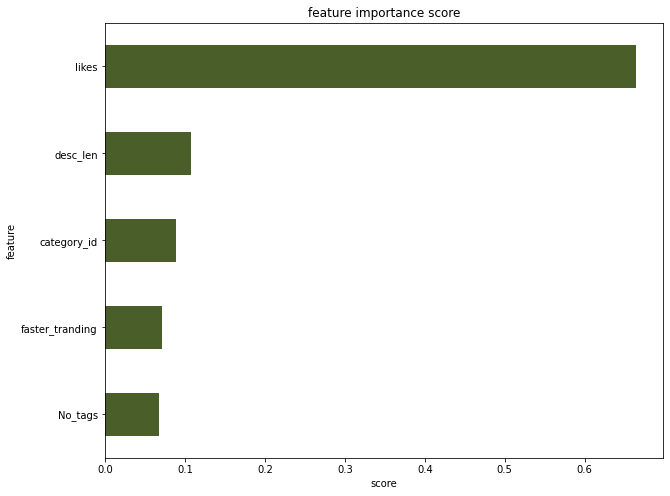

In [180]:
# feature important based on RandomForest
show_feature_importance(rf)
plt.savefig('Feature Important from Modelling.png')

# Conclusion
## Statement


Jika anda berada di negara India dan ingin meciptakan channel YouTube yang bisa dinikmati dan sangat diinginkan oleh banyak orang, anda harus belajar menganalisa hal apa yang bisa menarik perhatian viewer india dan berikut ini sedikit analisa yang mendukung kita untuk mendapatkan views yang banyak.


Terdapat beberapa faktor penting yang mempengaruhi jumlah views seperti **Likes, desc_len, category_id, faster_tranding**. berdasarkan faktor tersebut terdapat beberapa pendekatan yang dapat dilakukan untuk meningkatkan jumlah view. berikut ini strategi untuk mengoptimalkan faktor tersebut.

1. Optimasi teks deskripsi video.
  
  Menurut Nathan Thompson(2020) teks deskripsi terdiri dari 150-200 kata termasuk kata kunci yang kita gunakan serta penambahan links atau suggestion terhadap konten lain. Hal yang perlu diketahui, ketika deskripsi video terlalu panjang, untuk kalimat awal baiknya bersifat menarik minat baca penonton. hal ini penting karena penguna hanya akan melihat sekilas atau sedikit waktu untuk melihat video tersebut.

2. Mengkategorikan video

  Dalam beberapa kasus, hal ini akan sulit untuk menentukan diantara dua kategori yang serupa (seperti kategori 'comedy' dan 'entertainment') tetapi semakin lama kategori tersebut akan semakin jelas kelihatan kecenderungannya. 

3. Jumlah dan Best keyword Tags

  Pastikan bahwa keyword tags yang digunakan sesuai dengan konten yang ada, tags ini bisa ditempatkan pada title, subtitles , dan video description. Hal ini akan memudahkan YouTube untuk merekomendasikan content tepat pada pengunaan yang membutuhkan. Dalam menganalisa keyword yang tepat untuk tags kita bisa memanfaatkan **SEMrush,Ahrefs, YouTube's Suggest dan Google Trend's YouTube**.
Selain itu, untuk mengoptimalkan description video pemilihan keyword yang tepat akan efisien dan jelas dalam proses pembacaan. Berdasarkan hasil exploratory data jumlah tags yang mampu memberikan views yang tinggi berada pada **15-30 tags** dan tags tersebut haruslah relevan.  

Hal indikasi untuk melihat content akan memiliki view yang tinggi dilihat dari;

1. Likes

  Jumlah likes tentunya sejajar dengan jumlah views, dimana semakin banyak view tentunya semakin banyak penguna yang akan merespon like atau tidak.  Kita juga bisa menambahkan Like End Screens (Tombol like pada akhir video) untuk memperlihatkan video lainnya atau merekomendasikan channel yang berkaitan. selain itu bisa menambahkan Unlike End Screens untuk bertanya pada viewer untuk berpartisipasi dalam polling yang mana juga bermanfaat untuk meningkatkan ketertarikan user.

2. Faster_Tranding

  Nilai tranding tentunya sangat berhubungan dengan jumlah view yang tinggi (Youtube-SEO). Dalam hal ini perlu untuk melihat waktu rata-rata konten tersebut bisa dilihat oleh orang banyak. Jika pada batas tertentu tidak mencapai nilai views yang seharusnya, hal ini menunjukkan bahwa konten tersebut tidak akan memiliki views yang tinggi.




Final quote:
"The more time they spend on your videos, the more positive signals get sent to YouTube’s algorithm."

Referensi Strategi( https://optinmonster.com/youtube-seo/ )


